# CollabMP3

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Data Preprocessing

In [56]:
data = pd.read_csv("SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,pop,Ed Sheeran,I Don't Care (with Justin Bieber) - Loud Luxur...,6f807x0ima9a1j3VPbc7VN,66,0.1020,0.748,194754,0.916,0.000000,6,0.0653,-2.634,1,0.0583,122.036,0.518
1,pop,Maroon 5,Memories - Dillon Francis Remix,0r7CVbZTWZgbTCYdfa2P31,67,0.0724,0.726,162600,0.815,0.004210,11,0.3570,-4.969,1,0.0373,99.972,0.693
2,pop,Zara Larsson,All the Time - Don Diablo Remix,1z1Hg7Vb0AhHDiEmnDE79l,70,0.0794,0.675,176616,0.931,0.000023,1,0.1100,-3.432,0,0.0742,124.008,0.613
3,pop,The Chainsmokers,Call You Mine - Keanu Silva Remix,75FpbthrwQmzHlBJLuGdC7,60,0.0287,0.718,169093,0.930,0.000009,7,0.2040,-3.778,1,0.1020,121.956,0.277
4,pop,Lewis Capaldi,Someone You Loved - Future Humans Remix,1e8PAfcKUYoKkxPhrHqw4x,69,0.0803,0.650,189052,0.833,0.000000,1,0.0833,-4.672,1,0.0359,123.976,0.725


In [3]:
def visualize(data):
    corr = data.corr(method="pearson")
    plt.figure(figsize=(14,6))
    heatmap = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
    heatmap.set_title("Correlation")

    sample = data.sample(int(0.01*len(data)))
    print("Number of samples taken: ",len(sample))

    plt.figure(figsize=(10,6))
    sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")

    sns.set_style(style="darkgrid")
    plt.title("Duration of Songs")
    sns.color_palette("rocket", as_cmap = True)
    sns.barplot(y="genre", x="duration_ms", data = data)

    sns.set_style(style = "darkgrid")
    plt.figure(figsize=(10,5))
    famous = data.sort_values("popularity", ascending=False)
    sns.barplot(y="genre", x="popularity", data = famous).set(title="Top Genres by Popularity")

Number of samples taken:  328


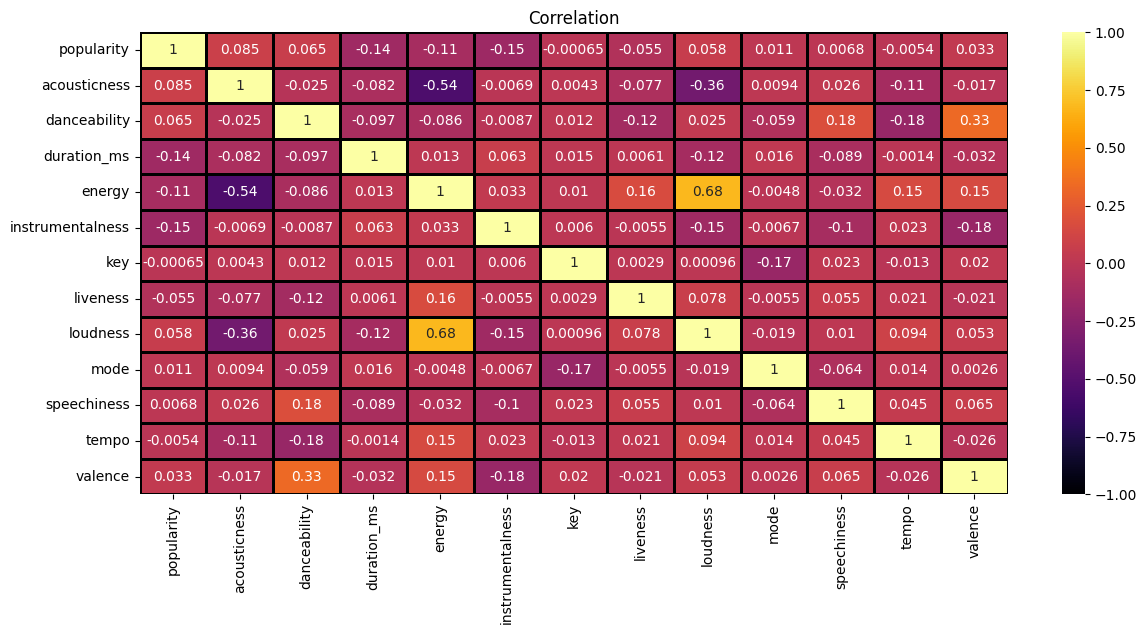

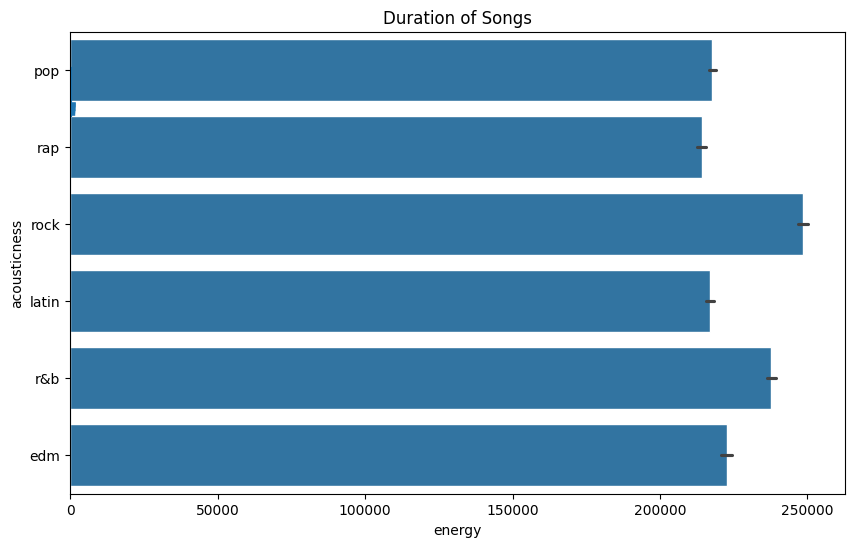

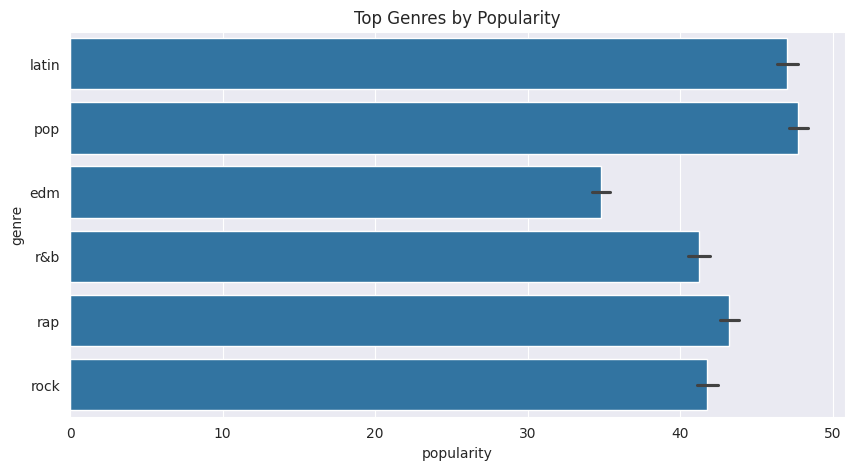

In [4]:
visualize(data)

In [5]:
def plot1(data):
    print("Mean value of acousticness:", data['acousticness'].mean())
    sns.histplot(x='acousticness', data=data, kde=True)
    plt.title("Trends in Acousticness")
    plt.xlabel('Acoustincess', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()

def plot2(data):
    # mean value and histplot for for energy feature
    print("Mean value of energy:", data['energy'].mean())
    sns.histplot(x='energy', data=data, kde=True)
    plt.title("Trends in Energy")
    plt.xlabel('Energy', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()

Mean value of acousticness: 0.1753337150793409


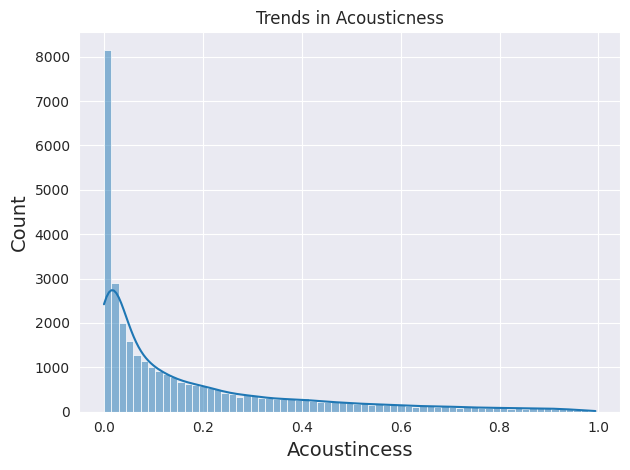

In [6]:
plot1(data)

Mean value of energy: 0.6986192707032558


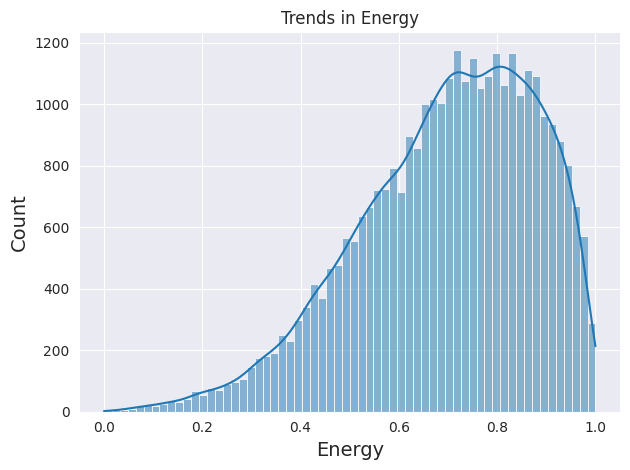

In [7]:
plot2(data)

In [8]:
def plot3(data):
    sample = data.sample(int(0.01*len(data)))
    print("Number of samples taken: ",len(sample))

    plt.figure(figsize=(10,6))
    sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")

Number of samples taken:  328


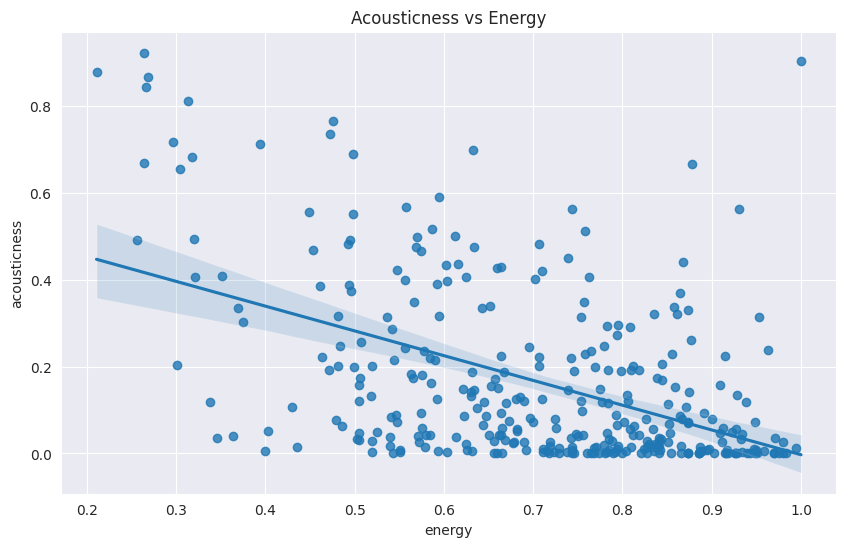

In [9]:
plot3(data)

### Cluster creation

In [10]:
def plot_clus(X, Y, kmeans):
    plt.figure(figsize=(10,6))
    plt.scatter(X[Y==0,0], X[Y==0,1], s=5, c='red', label="Cluster 1")
    plt.scatter(X[Y==1,0], X[Y==1,1], s=5, c='green', label="Cluster 2")
    plt.scatter(X[Y==2,0], X[Y==2,1], s=5, c='blue', label="Cluster 3")
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c="black", label='Centroids')
    plt.title("Clusters")

def cluster(data):
    X = data.iloc[:, [5,8]].values

    wcss = []
    for i in range(1,11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)

    sns.set()
    plt.plot(range(1,11), wcss)
    plt.title("Elbow graph")
    plt.show()

    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

    Y = kmeans.fit_predict(X)

    plot_clus(X, Y, kmeans)

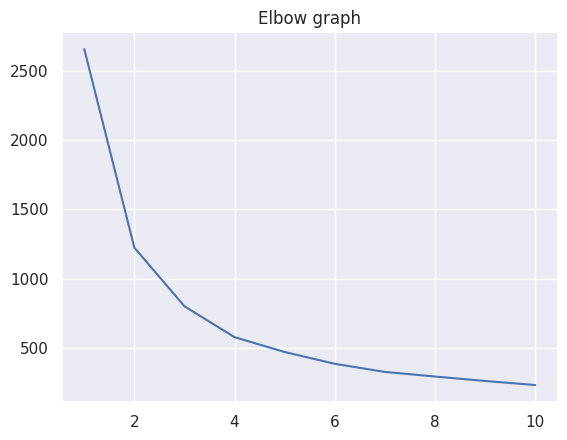

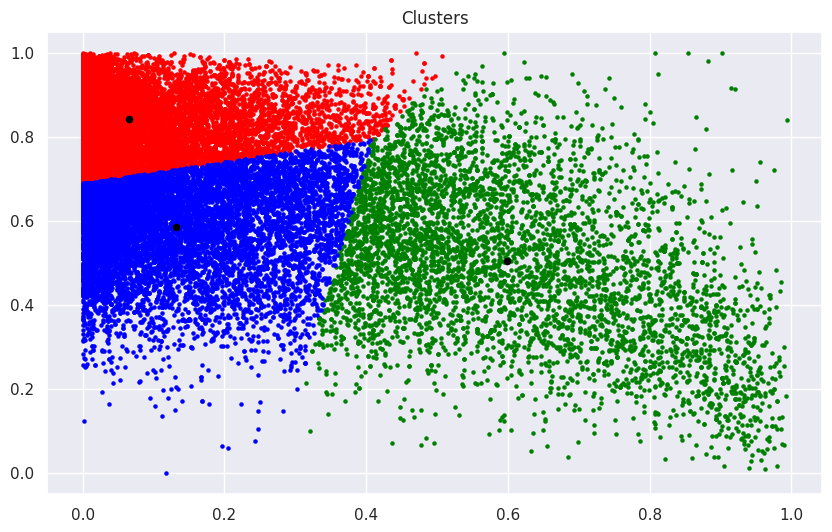

In [11]:
cluster(data)

Most Popular Songs

In [12]:
def most_popular(data):
    df2 = data.copy()
    df2.drop_duplicates(subset = "track_name", inplace = True) #dropping duplicate songs
    df2.head()

    rslt_df = df2.sort_values(by = 'popularity', ascending = False)
    rslt_df = rslt_df[['genre', 'artist_name', 'track_name']]

    print("Top 10 most popular songs:\n")
    for i in range(10):
        row_list = rslt_df.loc[i, :].values.flatten().tolist()
        print(row_list[1], "-", row_list[2])

In [13]:
most_popular(data)

Top 10 most popular songs:

Ed Sheeran - I Don't Care (with Justin Bieber) - Loud Luxury Remix
Maroon 5 - Memories - Dillon Francis Remix
Zara Larsson - All the Time - Don Diablo Remix
The Chainsmokers - Call You Mine - Keanu Silva Remix
Lewis Capaldi - Someone You Loved - Future Humans Remix
Ed Sheeran - Beautiful People (feat. Khalid) - Jack Wins Remix
Katy Perry - Never Really Over - R3HAB Remix
Sam Feldt - Post Malone (feat. RANI) - GATTÜSO Remix
Avicii - Tough Love - Tiësto Remix / Radio Edit
Shawn Mendes - If I Can't Have You - Gryffin Remix


### Code for single track that is being playing in real time by the user

### Plotting a random song on the plot

In [142]:
import random

num_rows = data.shape[0]
random_index = random.randint(0, num_rows - 1)
print(random_index)
df = data.iloc[[random_index]].reset_index(drop=True)

#example for red cluster
# df = data.iloc[[18187]].reset_index(drop=True)

#example for green cluster
# df = data.iloc[[25598]].reset_index(drop=True)

#example for blue cluster
# df = data.iloc[[23641]].reset_index(drop=True)

df.head()

14856


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,rock,Airbourne,This Is Our City,58HEA9tUNHri5ZI690qxlt,46,0.333,0.247,185285,0.931,0.0758,9,0.322,-2.811,1,0.0762,83.726,0.407


In [143]:
A = []
def song_features(data):
    B = []

    data = data.values.tolist()
    # print(data[0][8])
    # print(data[0][5])

    B.append(data[0][8])
    B.append(data[0][5])

    A.append(B)
    # print(A)

In [144]:
song_features(df)

In [145]:
from scipy.spatial import distance

def AddPoint(plot, x, y, color):
    plot.scatter(x, y, c=color)
    plot.figure(figsize=(10,6))
    plot.show()

def cal_cluster(A):
    dist=[]
    X = data.iloc[:, [5,8]].values
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
    Y = kmeans.fit_predict(X)
    for i in range(len(kmeans.cluster_centers_)):
        dist.append(distance.euclidean(kmeans.cluster_centers_[i], A[0]))
        # dist.append(distance.euclidean(kmeans.cluster_centers_[i], np.array(A[0], dtype=float)))
#     print(dist)
    num = pd.Series(dist).idxmin()

    if(num==0):
        print("Song is in RED cluster")
    elif(num==1):
        print("Song is in GREEN cluster")
    else:
        print("Song is in BLUE cluster")
    return num

Song is in GREEN cluster


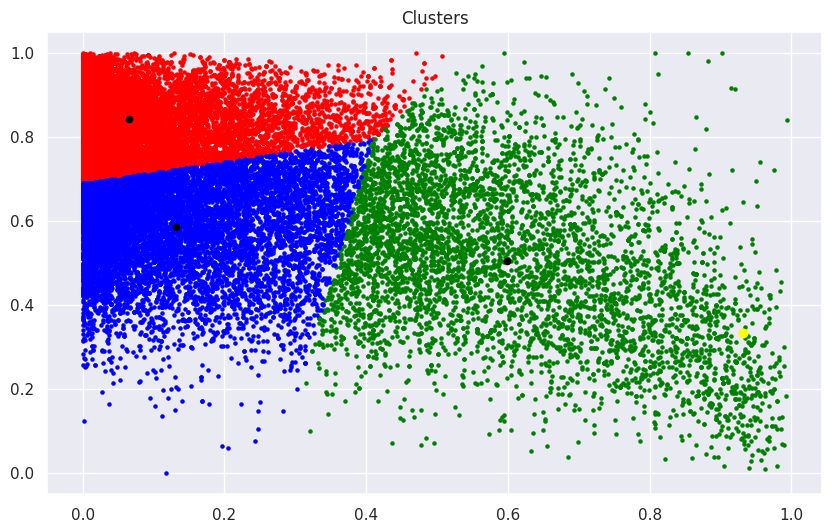

<Figure size 1000x600 with 0 Axes>

In [146]:
#determining which cluster the given song is in
num = cal_cluster(A)

X = data.iloc[:, [5,8]].values
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

#plotting the song in the scatter plot
plot_clus(X, Y, kmeans)
AddPoint(plt, A[0][0], A[0][1], 'yellow')

### Euclidean Distance

In [147]:
import math

def recommend(flag):
    eDist=[]
    for i in range(len(X[Y==flag])):
        eDistance = math.dist(A[0], X[Y==flag][i])
        eDist.append(eDistance)

    eDist2 = []
    eDist2.extend(eDist)
    eDist2.sort()
    eDist2

    for i in range(5):
        num = eDist.index(eDist2[i])
        arr = data.loc[(data['energy'] == X[Y==flag][num][1]) & (data['acousticness'] == X[Y==flag][num][0])]
        arr = arr.values.flatten().tolist()
        print(arr[2] , 'by', arr[1])

In [148]:
recommend(num)

Growing Pains by NANG
Surf by Osoku
On the Line by Fever Feel
RideOut by enjo
4:20 PM by Bluedoom
